In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
pd.set_option('display.max_colwidth', 1000)

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/gdrive')
data = pd.read_csv('/content/gdrive/MyDrive/IDS/movieReplicationSet.csv')
data

Mounted at /content/gdrive


,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


In [ ]:
# Assuming df is your DataFrame
# Calculate the mean of each column
column_means = data.iloc[:,0:400].mean(axis=0)

# Calculate the mean of each row
row_means = data.iloc[:,0:400].mean(axis=1)

# Replace NaN values with a blend of column and row means
df_filled = data.copy()
for col in data.iloc[:,0:400].columns:
    for idx in data.iloc[:,0:400].index:
        if pd.isna(data.loc[idx, col]):
            # Blend the means (50/50)
            blend_value = 0.5 * (column_means[col] + row_means[idx])
            df_filled.loc[idx, col] = blend_value

In [ ]:
# Check if row_means has any NaN values
nan_indices = row_means.isnull()

# Get the indices where row_means has NaN values
indices_with_nan = nan_indices[nan_indices].index

# Remove corresponding rows from df_filled
df_filled = df_filled.drop(indices_with_nan)

# Reset index after removing rows
df_filled = df_filled.reset_index(drop=True)
df_filled

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,2.447086,2.381992,4.000000,2.725235,3.000000,2.670257,2.554121,2.821232,2.619604,2.827211,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,2.439294,2.374200,1.500000,2.717443,2.752945,2.662464,2.546329,2.813440,2.611812,2.819419,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,2.733065,2.667971,3.234118,3.011214,3.046716,2.956236,2.840100,3.107211,2.905583,3.113190,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,2.282975,2.217880,2.000000,2.561123,3.000000,2.506145,2.390009,2.657120,2.455492,4.000000,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,2.209132,2.144038,3.500000,2.487281,0.500000,2.432303,0.500000,1.000000,2.381650,0.000000,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2.675658,2.610563,3.176711,2.953806,3.500000,2.898828,2.782692,3.049803,2.848175,3.055782,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1092,3.000000,4.000000,3.413546,3.190641,4.000000,4.000000,2.500000,3.286638,3.500000,3.500000,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1093,2.641923,2.576828,3.142976,2.920071,2.955574,2.865093,2.748957,3.500000,2.814440,3.022047,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1094,2.770970,2.705876,3.272023,3.049119,3.084621,2.994141,2.878005,3.145116,2.943488,3.151095,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


# Q1

In [ ]:

# Initialize lists to store COD values and best predictor for each movie
cod_values = []
best_predictors = []

# Loop through each movie
for target_movie in range(0, 400):
    # Select the target movie ratings
    target_ratings = df_filled.iloc[:, target_movie]

    # Initialize variables to store best predictor and COD
    best_predictor = None
    best_cod = -1

    # Loop through each other movie to build regression models
    for other_movie in range(0, 400):
        if other_movie != target_movie:
            # Select the other movie ratings
            other_ratings = df_filled.iloc[:, other_movie]

            # Prepare data for regression
            X = other_ratings.values.reshape(-1, 1)
            y = target_ratings.values.reshape(-1, 1)

            # Split data into training and testing sets
            # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Build linear regression model
            model = LinearRegression()
            # model.fit(X_train, y_train)
            model.fit(X, y)

            # Predict the ratings for the target movie
            # predicted_ratings = model.predict(X_test)
            predicted_ratings = model.predict(X)

            # Calculate COD
            cod = r2_score(y, predicted_ratings)

            # Update best predictor if current model has higher COD
            if cod > best_cod:
                best_cod = cod
                best_predictor = other_movie

    # Store COD value and best predictor for the current movie
    cod_values.append(best_cod)
    best_predictors.append(best_predictor)

# Calculate average COD
average_cod = np.mean(cod_values)

# Print average COD
print("Average COD:", average_cod)


Average COD: 0.42378171067196035


In [ ]:
df_filled.columns[0:400]

Index(['The Life of David Gale (2003)', 'Wing Commander (1999)',
       'Django Unchained (2012)', 'Alien (1979)',
       'Indiana Jones and the Last Crusade (1989)', 'Snatch (2000)',
       'Rambo: First Blood Part II (1985)', 'Fargo (1996)',
       'Let the Right One In (2008)', 'Black Swan (2010)',
       ...
       'X-Men 2 (2003)', 'The Usual Suspects (1995)', 'The Mask (1994)',
       'Jaws (1975)', 'Harry Potter and the Chamber of Secrets (2002)',
       'Patton (1970)', 'Anaconda (1997)', 'Twister (1996)',
       'MacArthur (1977)', 'Look Who's Talking (1989)'],
      dtype='object', length=400)

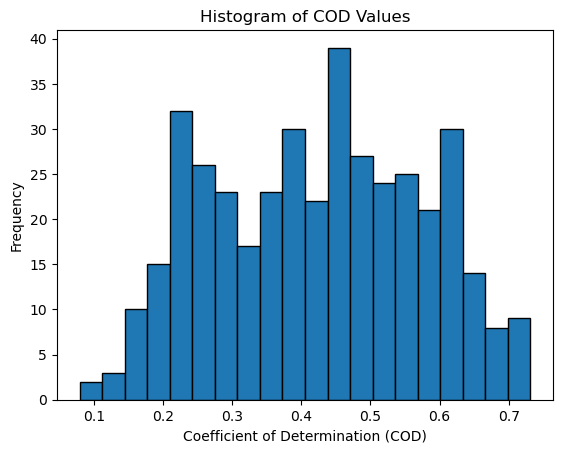

In [ ]:
# Create a histogram of COD values
plt.hist(cod_values, bins=20, edgecolor='black')
plt.xlabel('Coefficient of Determination (COD)')
plt.ylabel('Frequency')
plt.title('Histogram of COD Values')
plt.show()

# Create a table of top and bottom predictors
result_df = pd.DataFrame({
    'Movie': df_filled.columns[0:400],
    'COD': cod_values,
    'Best Predictor': df_filled.columns[best_predictors]
})

# Sort the DataFrame by COD values
result_df = result_df.sort_values(by='COD', ascending=False)

# Display the top and bottom 10 movies
top_10 = result_df.head(10)
bottom_10 = result_df.tail(10)

In [ ]:
top_10

,Movie,COD,Best Predictor
203,Erik the Viking (1989),0.731507,I.Q. (1994)
208,I.Q. (1994),0.731507,Erik the Viking (1989)
395,Patton (1970),0.713554,The Lookout (2007)
377,The Lookout (2007),0.713554,Patton (1970)
240,The Bandit (1996),0.711222,Best Laid Plans (1999)
249,Best Laid Plans (1999),0.711222,The Bandit (1996)
282,Congo (1995),0.700569,The Straight Story (1999)
287,The Straight Story (1999),0.700569,Congo (1995)
334,The Final Conflict (1981),0.700188,The Lookout (2007)
300,Ran (1985),0.692734,Heavy Traffic (1973)


In [ ]:
bottom_10

,Movie,COD,Best Predictor
248,Grown Ups 2 (2013),0.171119,The Core (2003)
14,The Fast and the Furious (2001),0.168991,Terminator 3: Rise of the Machines (2003)
41,13 Going on 30 (2004),0.160164,Can't Hardly Wait (1998)
292,Titanic (1997),0.154136,Cocktail (1988)
319,La La Land (2016),0.148514,The Lookout (2007)
190,The Cabin in the Woods (2012),0.143887,The Evil Dead (1981)
55,Clueless (1995),0.141426,Escape from LA (1996)
9,Black Swan (2010),0.117080,Sorority Boys (2002)
95,Interstellar (2014),0.111343,Torque (2004)
80,Avatar (2009),0.079485,Bad Boys (1995)


# Q2

In [ ]:
df_filled.iloc[:,474].value_counts(dropna=False)

Gender identity (1 = female; 2 = male; 3 = self-described)
1.0    807
2.0    260
NaN     23
3.0      6
Name: count, dtype: int64

In [ ]:
df_filled.iloc[:,475].value_counts(dropna=False)

Are you an only child? (1: Yes; 0: No; -1: Did not respond)
 0    894
 1    177
-1     25
Name: count, dtype: int64

In [ ]:
df_filled.iloc[:,476].value_counts(dropna=False)

Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
 1    610
 0    462
-1     24
Name: count, dtype: int64

In [ ]:
# Create a table of top and bottom predictors
result_df_idx = pd.DataFrame({
    'Movie': df_filled.columns[0:400],
    'COD': cod_values,
    'Best Predictor': best_predictors
})

# Sort the DataFrame by COD values
result_df_idx = result_df_idx.sort_values(by='COD', ascending=False)

# Display the top and bottom 10 movies
top_10_idx = result_df_idx.head(10)
bottom_10_idx = result_df_idx.tail(10)

In [ ]:
selected_movies = pd.concat([top_10_idx, bottom_10_idx], axis=0, ignore_index=False)
selected_movies

,Movie,COD,Best Predictor
203,Erik the Viking (1989),0.731507,208
208,I.Q. (1994),0.731507,203
395,Patton (1970),0.713554,377
377,The Lookout (2007),0.713554,395
240,The Bandit (1996),0.711222,249
249,Best Laid Plans (1999),0.711222,240
282,Congo (1995),0.700569,287
287,The Straight Story (1999),0.700569,282
334,The Final Conflict (1981),0.700188,377
300,Ran (1985),0.692734,309


In [ ]:
# Step 2: Build multiple regression models
all_r2_values = []

for idx,movie in selected_movies.iterrows():
    # Select predictors and target variable
    X = df_filled.iloc[:, [474, 475, 476, movie['Best Predictor']]]
    y = df_filled.iloc[:, idx]

    # Perform one-hot encoding for categorical predictors
    X_encoded = pd.get_dummies(X, columns=["Gender identity (1 = female; 2 = male; 3 = self-described)",
                                           "Are you an only child? (1: Yes; 0: No; -1: Did not respond)",
                                           "Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)"], drop_first=True)

    model = LinearRegression()
    model.fit(X_encoded, y)

    # Predict the ratings
    y_pred = model.predict(X_encoded)

    # Calculate R^2
    r2_value = r2_score(y, y_pred)
    all_r2_values.append(r2_value)

# Print R^2 values
print("R^2 values for multiple regression models:", all_r2_values)


R^2 values for multiple regression models: [0.7332162219231574, 0.7320320337739616, 0.7147645016135739, 0.7157574588283077, 0.7132378408903512, 0.7127504305710848, 0.7009323893241193, 0.7023364910530505, 0.7023460009805844, 0.6932845595752775, 0.18170476655633494, 0.1782350811633714, 0.16816900101231724, 0.16322703516989456, 0.15653372555539402, 0.158996128412211, 0.148708372754759, 0.12319280205666583, 0.11935594031636221, 0.08278644290778259]


In [ ]:
(all_r2_values - selected_movies['COD']).mean()

0.0049397491008224435

In [ ]:
#top movies
(all_r2_values[:10] - selected_movies['COD'][:10]).mean()

0.0014030356106208175

In [ ]:
#bottom movies
(all_r2_values[10:] - selected_movies['COD'][10:]).mean()

0.00847646259102407

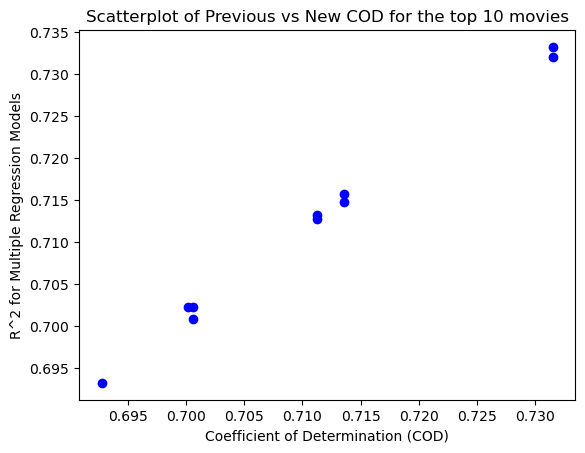

In [ ]:
plt.scatter(selected_movies['COD'][:10], all_r2_values[:10], color='blue')
plt.xlabel('Coefficient of Determination (COD)')
plt.ylabel('R^2 for Multiple Regression Models')
plt.title('Scatterplot of Previous vs New COD for the top 10 movies')
plt.show()

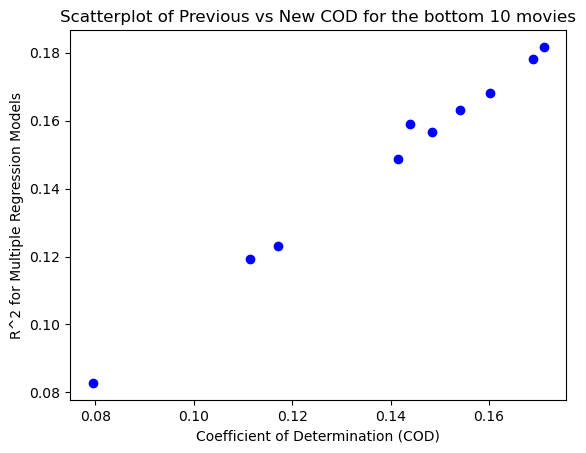

In [ ]:
plt.scatter(selected_movies['COD'][10:], all_r2_values[10:], color='blue')
plt.xlabel('Coefficient of Determination (COD)')
plt.ylabel('R^2 for Multiple Regression Models')
plt.title('Scatterplot of Previous vs New COD for the bottom 10 movies')
plt.show()

# Q3

In [ ]:
df_trimmed = result_df.iloc[10:-10]
# Step 2: Randomly sample 30 rows from the remaining data
output_df_col = df_trimmed.sample(n=30, random_state=42)
df_remaining = df_trimmed[~df_trimmed.index.isin(output_df_col.index)]
# Step 2: Sample 10 more rows from the remaining data
input_df_col = df_remaining.sample(n=10, random_state=42)

In [ ]:
input_10_df = df_filled.loc[:, df_filled.columns.isin(input_df_col['Movie'])]
output_30_df = df_filled.loc[:, df_filled.columns.isin(output_df_col['Movie'])]

In [ ]:
input_10_df

,Inglorious Bastards (2009),Pirates of the Caribbean: Dead Man's Chest (2006),Shrek (2001),The Proposal (2009),My Big Fat Greek Wedding (2002),Goodfellas (1990),Daredevil (2003),The Hulk (2003),Friday the 13th Part III (1982),Predator (1987)
0,2.899902,0.500000,3.0,3.000000,2.818953,2.926223,2.453536,2.596709,2.486698,2.649206
1,2.892110,1.500000,3.0,2.894577,2.811161,2.918431,2.445744,2.588917,2.478906,2.641414
2,3.185881,3.000000,3.5,3.188348,3.104932,3.212202,2.739515,2.882688,2.772677,2.935185
3,3.500000,2.000000,0.5,3.000000,2.654842,2.762112,2.289425,2.432598,2.322587,2.485095
4,2.661948,2.000000,3.0,4.000000,3.500000,2.688269,2.500000,1.500000,2.248744,2.411252
...,...,...,...,...,...,...,...,...,...,...
1091,3.128474,3.004982,3.0,3.130941,3.047525,3.154795,2.682108,2.825281,2.715269,2.877778
1092,3.500000,3.500000,4.0,4.000000,3.284359,3.500000,2.918943,3.062116,3.000000,3.500000
1093,3.094739,2.500000,3.5,3.500000,3.000000,3.121060,2.648373,2.791546,2.681535,2.844043
1094,3.223786,3.100294,2.5,3.500000,3.142837,3.250107,2.777420,2.920593,2.810582,2.973090


In [ ]:
rmse_results = pd.DataFrame(columns=['Movie', 'RMSE'])
beta_results = pd.DataFrame(columns=['Movie', 'Betas'])
alpha_results = pd.DataFrame(columns=['Movie', 'Alpha'])

for movie in output_df_col['Movie']:
    # Select the target variable (Y)
    y = output_30_df[movie]
    X = input_10_df

    # Step 3: Hyperparameter tuning with GridSearchCV
    param_grid = {'alpha': np.logspace(-3, 3, 7)}  # Adjust the range based on your data
    ridge = Ridge()
    grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

    # Step 4: Split the data into training and testing sets (80/20 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    grid_search.fit(X_train, y_train)

    # Best hyperparameter from grid search
    best_alpha = grid_search.best_params_['alpha']

    # Step 5: Train the ridge regression model on the training set
    ridge_model = Ridge(alpha=best_alpha)
    ridge_model.fit(X_train, y_train)
    betas = ridge_model.coef_
    # Step 6: Predict the ratings on the test set
    y_pred = ridge_model.predict(X_test)

    # Step 7: Calculate RMSE and store the result in the DataFrame
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    rmse_results = pd.concat([rmse_results,pd.DataFrame({'Movie': [movie], 'RMSE': [rmse]})], ignore_index=True)
    beta_results = pd.concat([beta_results,pd.DataFrame({'Movie': [movie], 'Betas': [betas]})], ignore_index=True)
    alpha_results = pd.concat([alpha_results,pd.DataFrame({'Movie': [movie], 'Alpha': [best_alpha]})], ignore_index=True)

In [ ]:
rmse_results_2 = pd.DataFrame(columns=['Movie', 'RMSE'])
beta_results_2 = pd.DataFrame(columns=['Movie', 'Betas'])
alpha_results_2 = pd.DataFrame(columns=['Movie', 'Alpha'])

for movie in output_df_col['Movie']:
    # Select the target variable (Y)
    y = output_30_df[movie]
    X = input_10_df

    # Step 3: Hyperparameter tuning with GridSearchCV
    param_grid = {'alpha': range(5,120,5)}  # Adjust the range based on your data
    ridge = Ridge()
    grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

    # Step 4: Split the data into training and testing sets (80/20 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    grid_search.fit(X_train, y_train)

    # Best hyperparameter from grid search
    best_alpha = grid_search.best_params_['alpha']

    # Step 5: Train the ridge regression model on the training set
    ridge_model = Ridge(alpha=best_alpha)
    ridge_model.fit(X_train, y_train)
    betas = ridge_model.coef_
    # Step 6: Predict the ratings on the test set
    y_pred = ridge_model.predict(X_test)

    # Step 7: Calculate RMSE and store the result in the DataFrame
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    rmse_results_2 = pd.concat([rmse_results_2,pd.DataFrame({'Movie': [movie], 'RMSE': [rmse]})], ignore_index=True)
    beta_results_2 = pd.concat([beta_results_2,pd.DataFrame({'Movie': [movie], 'Betas': [betas]})], ignore_index=True)
    alpha_results_2 = pd.concat([alpha_results_2,pd.DataFrame({'Movie': [movie], 'Alpha': [best_alpha]})], ignore_index=True)

In [ ]:
alpha_results_2['prev_alpha'] = alpha_results['Alpha']
alpha_results_2['RMSE'] = rmse_results_2['RMSE']
alpha_results_2['prev_RMSE'] = rmse_results['RMSE']
alpha_results_2['diff_RMSE'] = alpha_results_2['RMSE'] - alpha_results_2['prev_RMSE']
alpha_results_2

,Movie,Alpha,prev_alpha,RMSE,prev_RMSE,diff_RMSE
0,Finding Nemo (2003),90,100.0,0.650672,0.650845,-0.000173
1,Who Framed Roger Rabbit (1988),30,10.0,0.432998,0.434047,-0.001049
2,Alien (1979),40,10.0,0.496382,0.501050,-0.004669
3,The Doom Generation (1995),40,10.0,0.236184,0.234063,0.002121
4,MacArthur (1977),50,100.0,0.280255,0.283314,-0.003059
5,The Exorcist (1973),40,10.0,0.665295,0.667326,-0.002031
6,Double Jeopardy (1999),10,10.0,0.334060,0.334060,0.000000
7,Ocean's Eleven (2001),80,100.0,0.513583,0.514670,-0.001087
8,The Sixth Sense (1999),20,10.0,0.566404,0.566455,-0.000051
9,Just Like Heaven (2005),110,100.0,0.348139,0.347341,0.000798


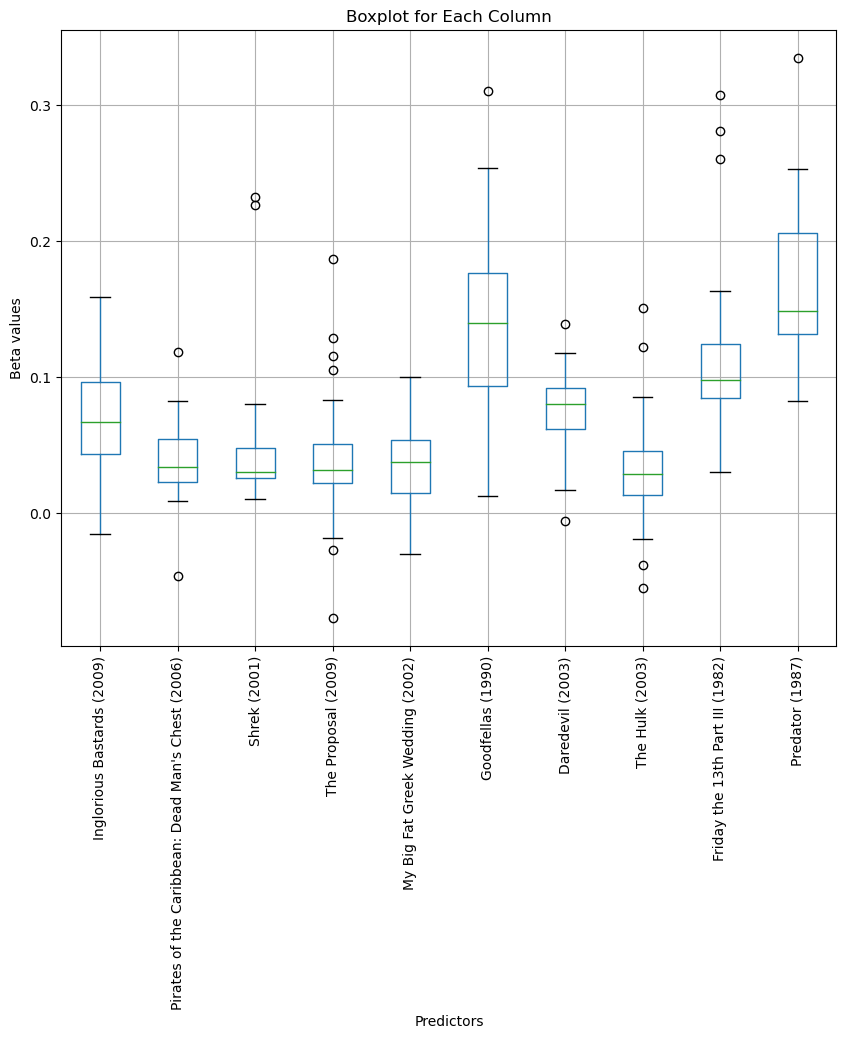

<Figure size 640x480 with 0 Axes>

In [ ]:
betas = pd.DataFrame(beta_results_2.Betas.tolist(), index= beta_results_2.index)
# Create a boxplot for each column
ax = betas.boxplot(figsize=(10,8))
# Set custom x-axis labels
ax.set_xticklabels(input_10_df.columns, rotation=90)
plt.xlabel('Predictors')
plt.ylabel('Beta values')
plt.title('Boxplot for Each Column')
# Show the plot
plt.show()
plt.savefig('boxplot_ridge.png')

# Q4

In [ ]:
rmse_results_lasso = pd.DataFrame(columns=['Movie', 'RMSE'])
beta_results_lasso = pd.DataFrame(columns=['Movie', 'Betas'])
alpha_results_lasso = pd.DataFrame(columns=['Movie', 'Alpha'])

for movie in output_df_col['Movie']:
    # Select the target variable (Y)
    y = output_30_df[movie]
    X = input_10_df

    # Step 3: Hyperparameter tuning with GridSearchCV
    param_grid = {'alpha': np.logspace(-3, 3, 7)}  # Adjust the range based on your data
    lasso = Lasso()
    grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

    # Step 4: Split the data into training and testing sets (80/20 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    grid_search.fit(X_train, y_train)

    # Best hyperparameter from grid search
    best_alpha = grid_search.best_params_['alpha']

    # Step 5: Train the ridge regression model on the training set
    lasso_model = Lasso(alpha=best_alpha)
    lasso_model.fit(X_train, y_train)
    betas = lasso_model.coef_
    # Step 6: Predict the ratings on the test set
    y_pred = lasso_model.predict(X_test)

    # Step 7: Calculate RMSE and store the result in the DataFrame
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    rmse_results_lasso = pd.concat([rmse_results_lasso,pd.DataFrame({'Movie': [movie], 'RMSE': [rmse]})], ignore_index=True)
    beta_results_lasso = pd.concat([beta_results_lasso,pd.DataFrame({'Movie': [movie], 'Betas': [betas]})], ignore_index=True)
    alpha_results_lasso = pd.concat([alpha_results_lasso,pd.DataFrame({'Movie': [movie], 'Alpha': [best_alpha]})], ignore_index=True)

In [ ]:
alpha_results_lasso['Alpha'].value_counts()

Alpha
0.001    22
0.010     8
Name: count, dtype: int64

In [ ]:
rmse_results_lasso_2 = pd.DataFrame(columns=['Movie', 'RMSE'])
beta_results_lasso_2 = pd.DataFrame(columns=['Movie', 'Betas'])
alpha_results_lasso_2 = pd.DataFrame(columns=['Movie', 'Alpha'])

for movie in output_df_col['Movie']:
    # Select the target variable (Y)
    y = output_30_df[movie]
    X = input_10_df
    alpha_values = np.linspace(0.0001, 0.1, num=int((0.1 - 0.0001) / 0.0005) + 1)
    # Step 3: Hyperparameter tuning with GridSearchCV
    param_grid = {'alpha': alpha_values}  # Adjust the range based on your data
    lasso = Lasso()
    grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

    # Step 4: Split the data into training and testing sets (80/20 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    grid_search.fit(X_train, y_train)

    # Best hyperparameter from grid search
    best_alpha = grid_search.best_params_['alpha']

    # Step 5: Train the ridge regression model on the training set
    lasso_model = Lasso(alpha=best_alpha)
    lasso_model.fit(X_train, y_train)
    betas = lasso_model.coef_
    # Step 6: Predict the ratings on the test set
    y_pred = lasso_model.predict(X_test)

    # Step 7: Calculate RMSE and store the result in the DataFrame
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    rmse_results_lasso_2 = pd.concat([rmse_results_lasso_2,pd.DataFrame({'Movie': [movie], 'RMSE': [rmse]})], ignore_index=True)
    beta_results_lasso_2 = pd.concat([beta_results_lasso_2,pd.DataFrame({'Movie': [movie], 'Betas': [betas]})], ignore_index=True)
    alpha_results_lasso_2 = pd.concat([alpha_results_lasso_2,pd.DataFrame({'Movie': [movie], 'Alpha': [best_alpha]})], ignore_index=True)

In [ ]:
rmse_results_lasso_2['RMSE'] - rmse_results_lasso['RMSE']

0     0.000869
1    -0.000018
2     0.001026
3    -0.000566
4    -0.000740
5    -0.000003
6    -0.000032
7     0.000144
8    -0.000024
9     0.001144
10    0.000174
11   -0.001036
12    0.001570
13   -0.000147
14   -0.003072
15   -0.002098
16    0.000259
17   -0.000038
18   -0.001136
19    0.001256
20   -0.000478
21   -0.000007
22    0.000236
23    0.000003
24   -0.000274
25   -0.000745
26    0.000281
27    0.001227
28    0.000240
29    0.000053
Name: RMSE, dtype: float64

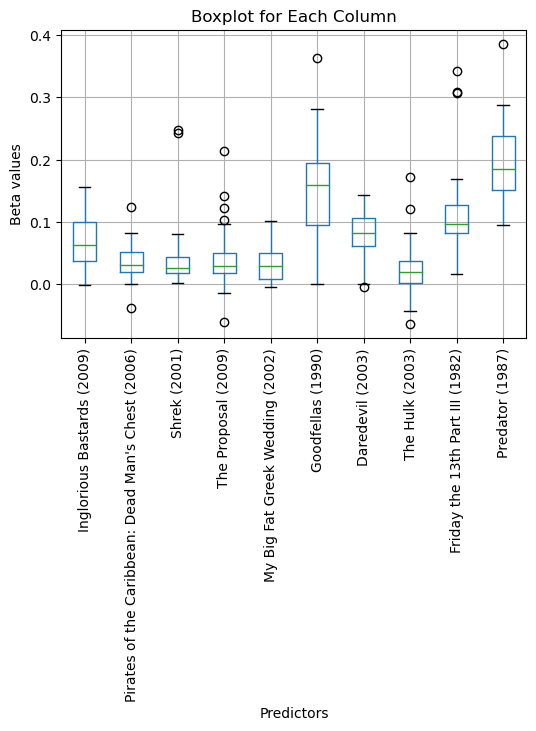

<Figure size 640x480 with 0 Axes>

In [ ]:
betas_lasso = pd.DataFrame(beta_results_lasso.Betas.tolist(), index= beta_results.index)
# Create a boxplot for each column
ax = betas_lasso.boxplot(figsize=(6,4))
# Set custom x-axis labels
ax.set_xticklabels(input_10_df.columns, rotation=90)
plt.xlabel('Predictors')
plt.ylabel('Beta values')
plt.title('Boxplot for Each Column')
# Show the plot
plt.show()
plt.savefig('boxplot_lasso.png')

# Q5

In [ ]:
X = data.iloc[:,0:400].mean(axis=1) #ignoring Nan values by default
nan_indices = X.isnull()
# Get the indices where row_means has NaN values
indices_with_nan = nan_indices[nan_indices].index
# Remove corresponding rows from df_filled
X = X.drop(indices_with_nan)
X = X.reset_index(drop=True)
X

0       2.742857
1       2.727273
2       3.314815
3       2.414634
4       2.266949
          ...   
1091    3.200000
1092    3.673669
1093    3.132530
1094    3.390625
1095    2.873874
Length: 1096, dtype: float64

In [ ]:
avg_movie_ratings = data.iloc[:,0:400].mean(axis=0)
sorted_avg_ratings = avg_movie_ratings.sort_values()
midpoint = len(sorted_avg_ratings) // 2
# Select 4 values around the midpoint
target_movies = sorted_avg_ratings[midpoint - 2: midpoint + 2]
target_movies

Fahrenheit 9/11 (2004)         2.578014
Happy Gilmore (1996)           2.581169
Diamonds are Forever (1971)    2.582677
Scream (1996)                  2.584270
dtype: float64

In [ ]:
selected_columns = df_filled[target_movies.index]
medians = selected_columns.median()
medians

Fahrenheit 9/11 (2004)         2.798028
Happy Gilmore (1996)           2.808316
Diamonds are Forever (1971)    2.799387
Scream (1996)                  2.816788
dtype: float64

In [ ]:
df_labels = pd.DataFrame(index=X.index, columns=medians.index)

In [ ]:
df_filled

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,2.447086,2.381992,4.000000,2.725235,3.000000,2.670257,2.554121,2.821232,2.619604,2.827211,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,2.439294,2.374200,1.500000,2.717443,2.752945,2.662464,2.546329,2.813440,2.611812,2.819419,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,2.733065,2.667971,3.234118,3.011214,3.046716,2.956236,2.840100,3.107211,2.905583,3.113190,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,2.282975,2.217880,2.000000,2.561123,3.000000,2.506145,2.390009,2.657120,2.455492,4.000000,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,2.209132,2.144038,3.500000,2.487281,0.500000,2.432303,0.500000,1.000000,2.381650,0.000000,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2.675658,2.610563,3.176711,2.953806,3.500000,2.898828,2.782692,3.049803,2.848175,3.055782,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1092,3.000000,4.000000,3.413546,3.190641,4.000000,4.000000,2.500000,3.286638,3.500000,3.500000,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1093,2.641923,2.576828,3.142976,2.920071,2.955574,2.865093,2.748957,3.500000,2.814440,3.022047,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1094,2.770970,2.705876,3.272023,3.049119,3.084621,2.994141,2.878005,3.145116,2.943488,3.151095,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


In [ ]:
df_labels = pd.DataFrame(index=X.index, columns=medians.index)
# Populate the DataFrame based on the conditions
for movie in medians.index:
    col_index = df_filled.columns.get_loc(movie)
    df_labels[movie] = (df_filled.iloc[:,col_index] >= medians[movie]).astype(int)
df_labels

,Fahrenheit 9/11 (2004),Happy Gilmore (1996),Diamonds are Forever (1971),Scream (1996)
0,0,1,0,0
1,0,0,0,0
2,1,1,1,1
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
1091,1,1,1,1
1092,1,1,1,1
1093,1,1,1,1
1094,1,1,1,1


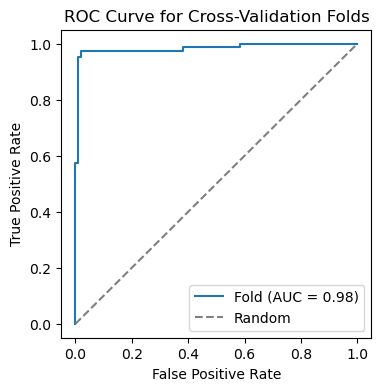

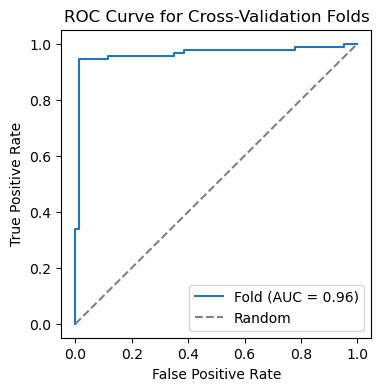

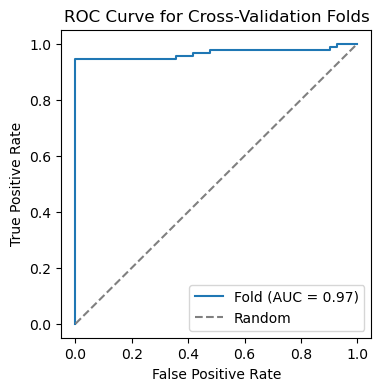

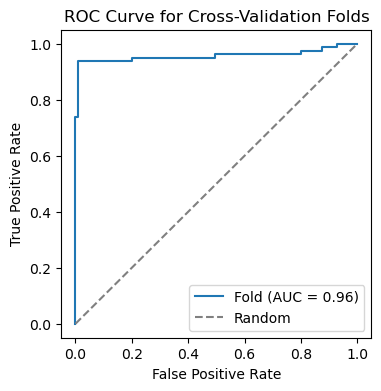

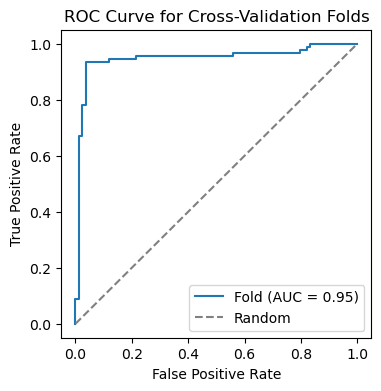

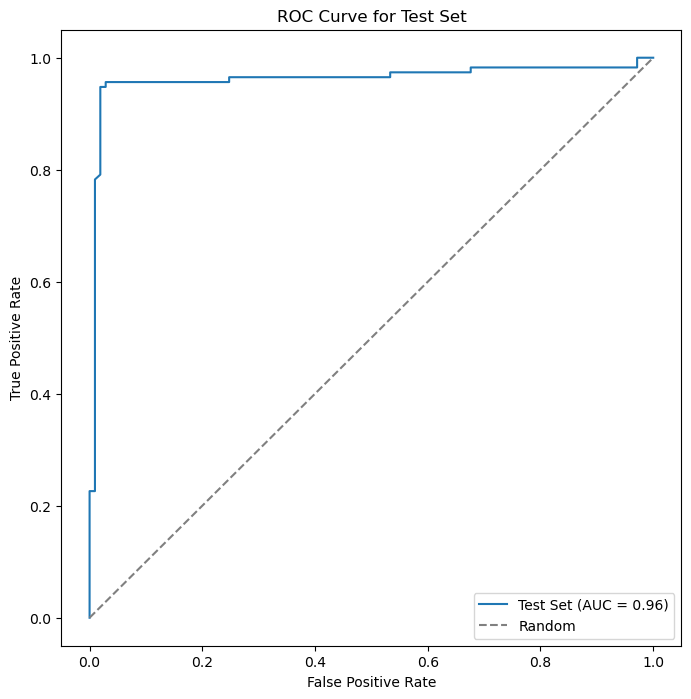

Final Model Betas: [[7.28782443]]
Final Model AUC on Test Set: 0.96


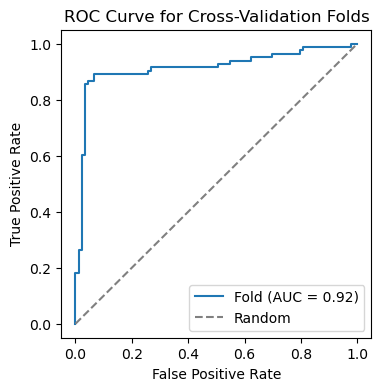

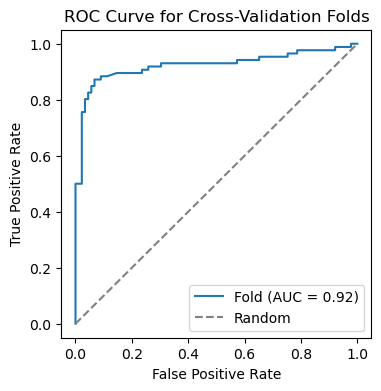

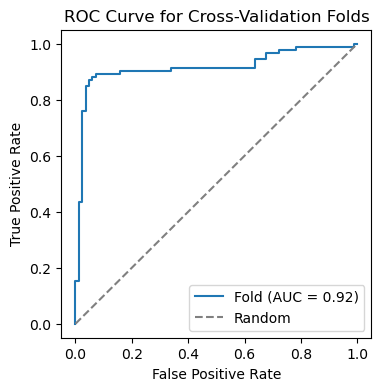

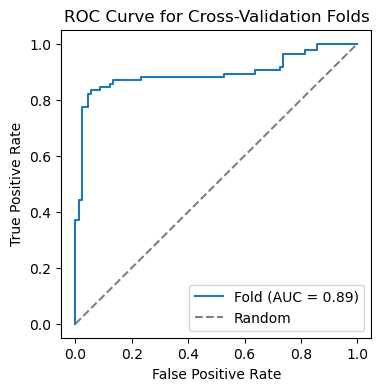

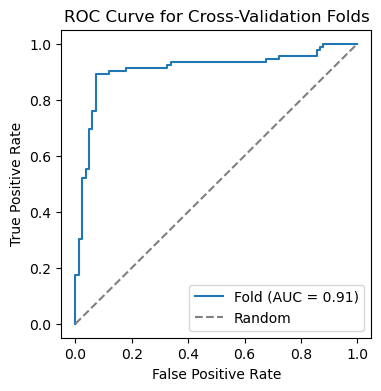

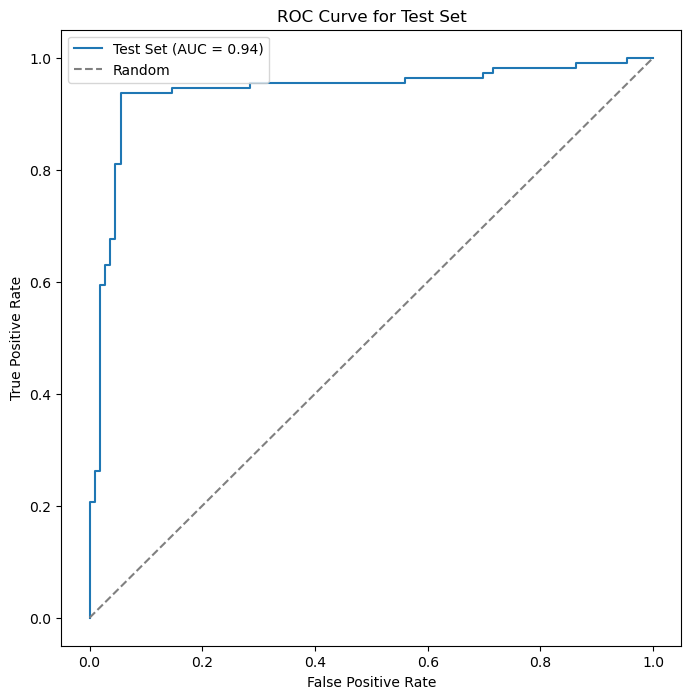

Final Model Betas: [[4.9307424]]
Final Model AUC on Test Set: 0.94


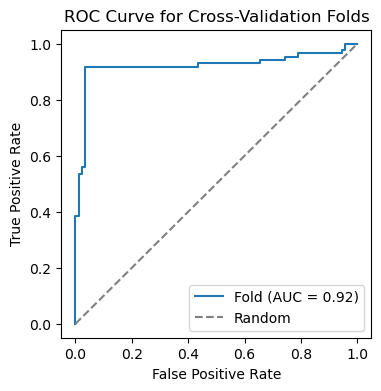

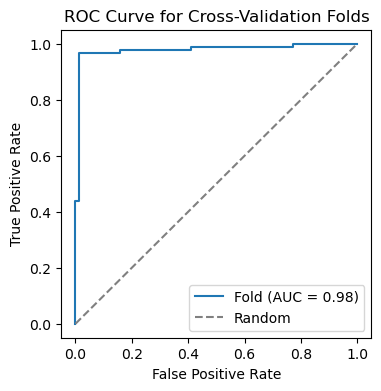

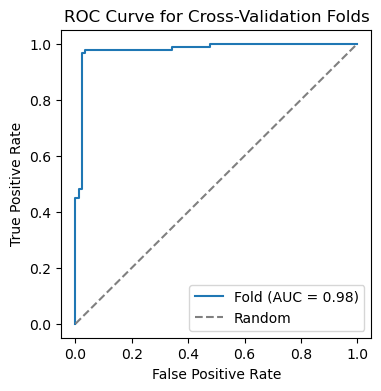

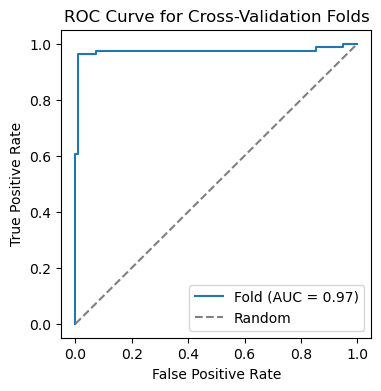

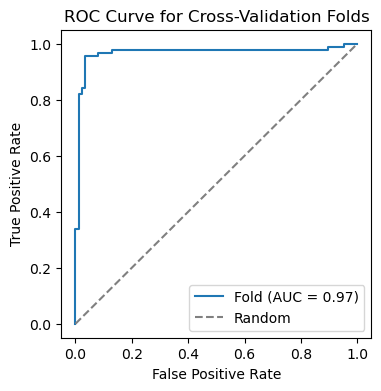

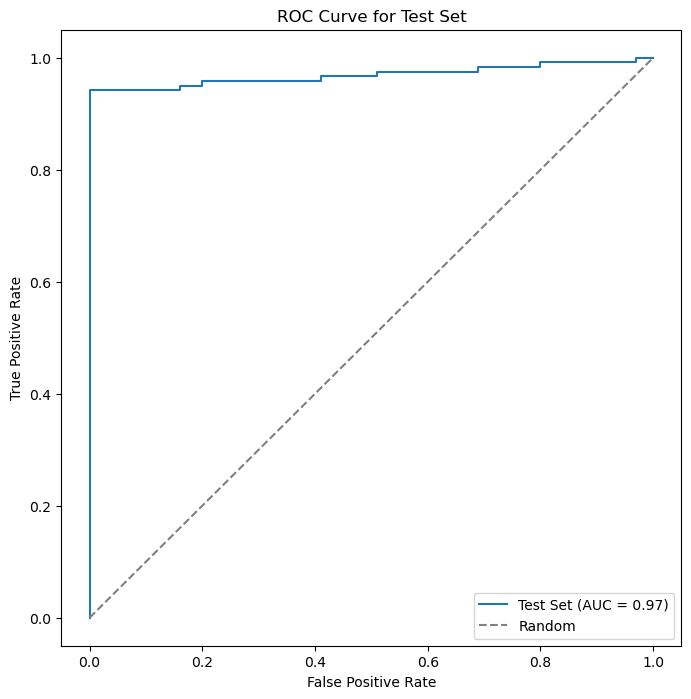

Final Model Betas: [[7.09364767]]
Final Model AUC on Test Set: 0.97


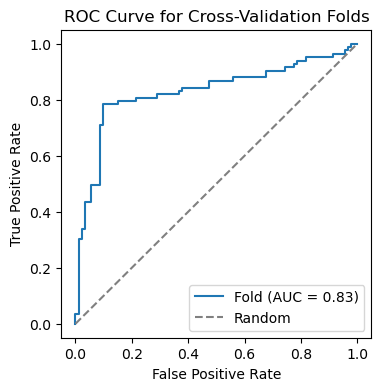

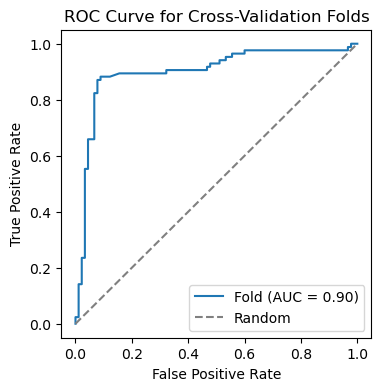

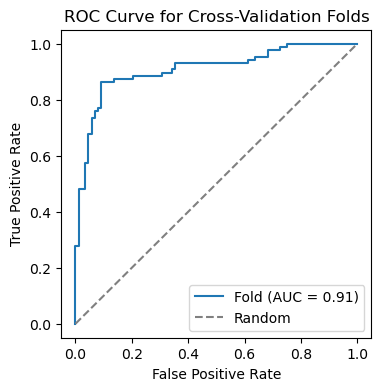

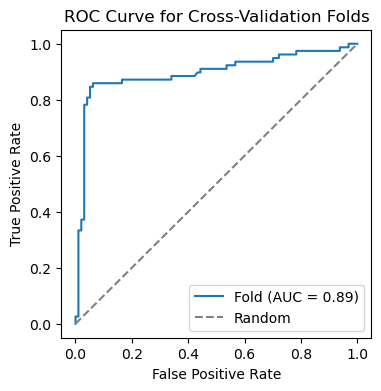

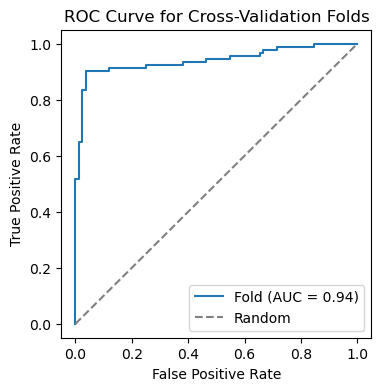

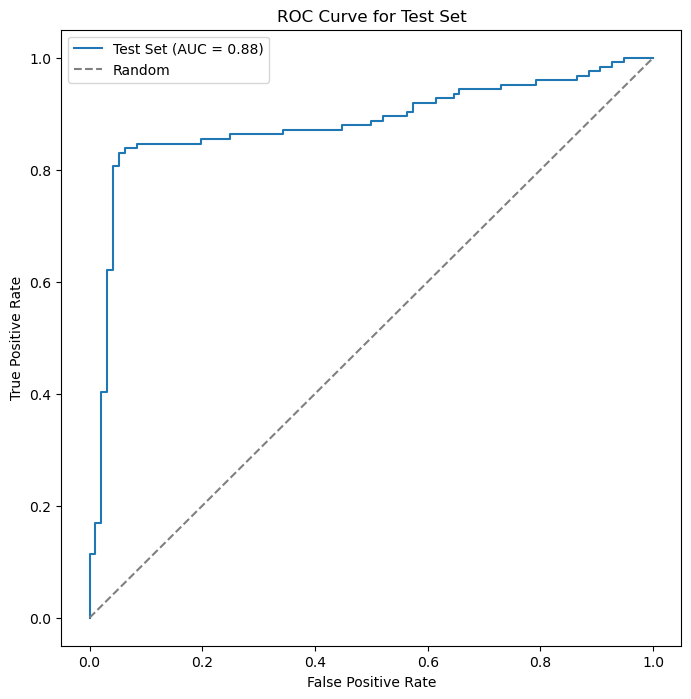

Final Model Betas: [[4.56740809]]
Final Model AUC on Test Set: 0.88


In [ ]:
results_q5 = pd.DataFrame(columns=['Movie', 'AUC', 'B1', 'B0'])
reports=[]
matrices=[]
for movie in df_labels.columns:
    Y = df_labels[movie]
    # Set up train-test split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Set up KFold cross-validation with k=5
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize logistic regression model
    model = LogisticRegression()

    # Perform k-fold cross-validation on the training set
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        Y_train_fold, Y_val_fold = Y_train.iloc[train_index], Y_train.iloc[val_index]
        X_train_fold = np.array(X_train_fold).reshape(-1,1)
        model.fit(X_train_fold, Y_train_fold)
        # Make predictions on the validation fold
        X_val_fold = np.array(X_val_fold).reshape(-1,1)
        predicted_probs = model.predict_proba(X_val_fold)[:, 1]

        # Plot ROC curve for each fold
        fpr, tpr, _ = roc_curve(Y_val_fold, predicted_probs)
        plt.figure(figsize=(4, 4))
        plt.plot(fpr, tpr, label=f'Fold (AUC = {roc_auc_score(Y_val_fold, predicted_probs):.2f})')
        plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
        plt.title('ROC Curve for Cross-Validation Folds')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()

    X_train = np.array(X_train).reshape(-1,1)
    X_test = np.array(X_test).reshape(-1,1)
    # Train the model on the entire training set
    model.fit(X_train, Y_train)

    # Make predictions on the test set
    predicted_probs_test = model.predict_proba(X_test)[:, 1]

    # Plot ROC curve for the test set
    fpr_test, tpr_test, _ = roc_curve(Y_test, predicted_probs_test)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr_test, tpr_test, label=f'Test Set (AUC = {roc_auc_score(Y_test, predicted_probs_test):.2f})')
    plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
    plt.title('ROC Curve for Test Set')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Report betas (coefficients) for the final model
    betas = model.coef_
    intercept = model.intercept_
    print(f'Final Model Betas: {betas}')

    # Report AUC value for the test set
    auc_test = roc_auc_score(Y_test, predicted_probs_test)
    print(f'Final Model AUC on Test Set: {auc_test:.2f}')
    results_q5 = pd.concat([results_q5,pd.DataFrame({'Movie': [movie], 'AUC': [auc_test], 'B1':[betas], 'B0':[intercept]})], ignore_index=True)
    report = classification_report(Y_test, (predicted_probs_test > 0.5).astype(int))
    matrix = confusion_matrix(Y_test, (predicted_probs_test > 0.5).astype(int))
    reports.append(report)
    matrices.append(matrix)

In [ ]:
results_q5

,Movie,AUC,B1,B0
0,Fahrenheit 9/11 (2004),0.961781,[[7.287824429539089]],[-21.895420517145478]
1,Happy Gilmore (1996),0.939582,[[4.93074239820823]],[-14.76121669003269]
2,Diamonds are Forever (1971),0.968833,[[7.0936476691888215]],[-21.360453514308713]
3,Scream (1996),0.881300,[[4.567408089572136]],[-13.76465772868212]


In [ ]:
for report in reports:
    print(report)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.94      0.96      0.95       115

    accuracy                           0.95       220
   macro avg       0.95      0.94      0.95       220
weighted avg       0.95      0.95      0.95       220

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       109
           1       0.87      0.94      0.90       111

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       100
           1       1.00      0.94      0.97       120

    accuracy                           0.97       220
   macro avg       0.97      0.97      0.97       220
weighted avg       0.97      0.97      0.97       220

              preci

In [ ]:
for matrix in matrices:
    print(matrix)

[[ 98   7]
 [  5 110]]
[[ 94  15]
 [  7 104]]
[[100   0]
 [  7 113]]
[[ 88   8]
 [ 20 104]]


Extra Credit


In [ ]:
#Make a data frame with no NaN values
df_complete = df_filled.dropna()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, the average silhouette_score is: 0.16280728905379352


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, the average silhouette_score is: 0.07222299412658507


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, the average silhouette_score is: 0.05885106236528284


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, the average silhouette_score is: 0.03436500921004341


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, the average silhouette_score is: 0.019713003746663082


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, the average silhouette_score is: 0.014293684308246716


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, the average silhouette_score is: 0.018409148016076814


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, the average silhouette_score is: 0.01310392292612552


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, the average silhouette_score is: 0.005877293936169012


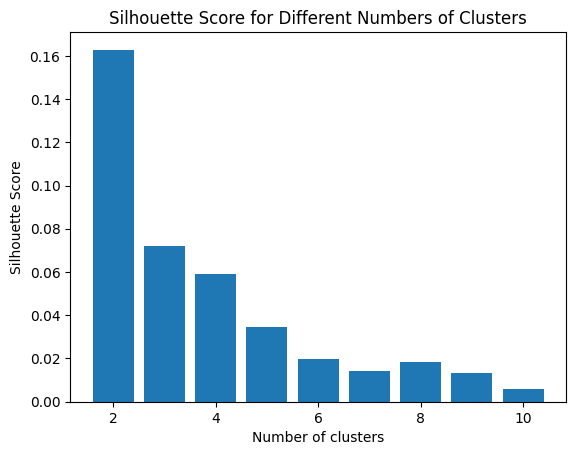

In [ ]:
#Perfom Silhoutte method to find the best Kmeans clusters number
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


# We will test the silhouette score for different numbers of clusters
range_n_clusters = list(range(2, 11))
silhouette_avg_scores = []

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator seed for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_complete)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(df_complete, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

    print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")

# Plotting the silhouette scores
plt.figure()
plt.bar(range_n_clusters, silhouette_avg_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

In [ ]:
# Choose the number of clusters (k) based on the silhoutte methods
k = 2

#: Running K-means Clustering
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df_complete)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


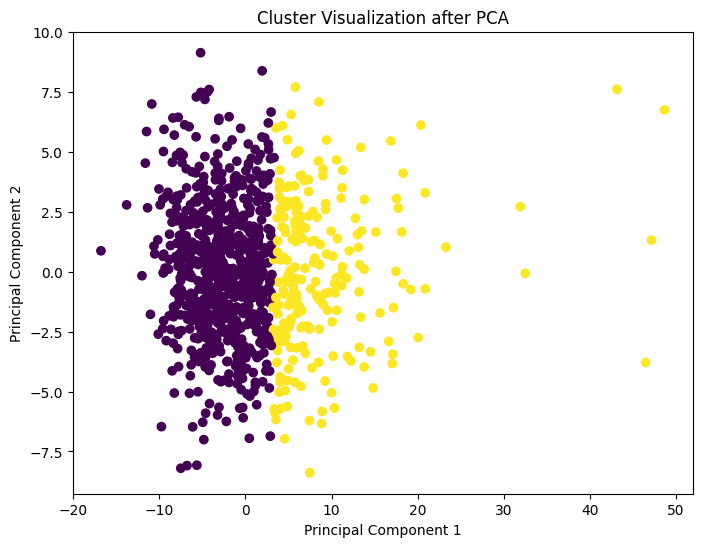

In [ ]:
#Looking at the clusters with PCA decomposition
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Applying PCA to reduce dimensions to 2
pca = PCA(2)
principal_components = pca.fit_transform(df_complete)

# Create a new DataFrame for the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df['Cluster'] = y_kmeans  # y_kmeans from your K-means clustering

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pc_df['PC1'], pc_df['PC2'], c=pc_df['Cluster'], cmap='viridis')
plt.title('Cluster Visualization after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
